# Non-Maxima supression

In [1]:
import numpy as np
from scipy.misc import imread, imsave, imresize
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

In [2]:
def non_max_suppression_fast(boxes, overlapThresh):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []

    # if the bounding boxes integers, convert them to floats --
    # this is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    # initialize the list of picked indexes	
    pick = []

    # grab the coordinates of the bounding boxes
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]

    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    # Sort by something (could be scores)
    idxs = np.argsort(y2)

    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        # compute overlap beween current box and other boxes (Almost like jaccard overlap)
        overlap = (w * h) / area[idxs[:last]]

        # Filterout all boxes with overlap bigger than threshold
        idxs = np.delete(idxs, np.concatenate(([last],
            np.where(overlap > overlapThresh)[0])))

    # return only the bounding boxes that were picked using the
    # integer data type
    return boxes[pick].astype("int")

In [3]:
images = [
    ("images/zombies_01.jpg", np.array([
    (180, 72, 244, 136),
    (186, 72, 250, 136),
    (186, 78, 250, 142)])),
    ("images/zombies_02.jpg", np.array([
    (504, 306, 568, 370),
    (217, 150, 395, 328)])),
    ("images/sarah4.jpg", np.array([
    (66, 100, 244, 278),
    (83, 100, 261, 278),
    (66, 117, 244, 295),
    (83, 117, 261, 295),
    (66, 133, 244, 311),
    (83, 133, 261, 311)]))]

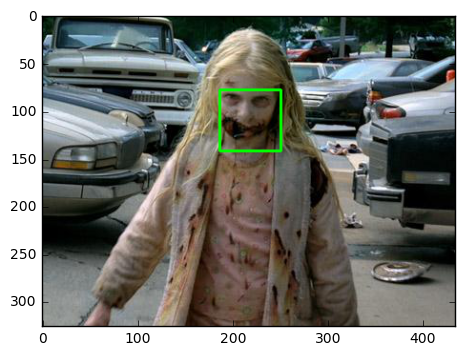

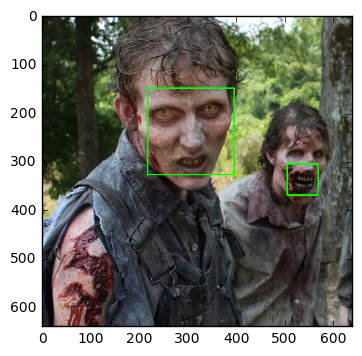

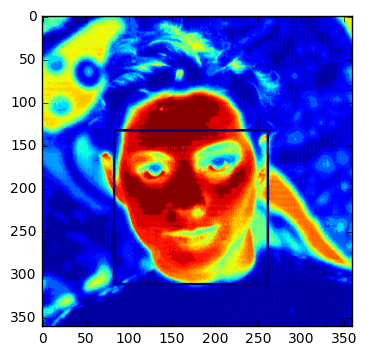

In [4]:
# loop over the images
for (imagePath, boundingBoxes) in images:
    # load the image and clone it
    #print ("[x] %d initial bounding boxes" % (len(boundingBoxes)))
    image = imread(imagePath)
    orig = image.copy()

    # loop over the bounding boxes for each image and draw them
    for (startX, startY, endX, endY) in boundingBoxes:
        #rect = patches.Rectangle((startX,startY),endX,endY,linewidth=1,edgecolor='g',facecolor='none')
        cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 0, 255), 2)

    # perform non-maximum suppression on the bounding boxes
    pick = non_max_suppression_fast(boundingBoxes, 0.4)
    #print "[x] after applying non-maximum, %d bounding boxes" % (len(pick))

    # loop over the picked bounding boxes and draw them
    for (startX, startY, endX, endY) in pick:
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

    # display the images
    plt.imshow(orig)
    plt.imshow(image)
    plt.show()